# Firearm Seizures in Pittsburgh

This dataset provides information on where firearms have been seized by police in Pittsburgh, the neighborhood, how many firearms were taken, and what type. Other information is included as well, such as the police zone

In [64]:
import pandas as pd

data_path = "firearms.csv"  
df = pd.read_csv(data_path)
print(df.head(10))

   _id                                          address  total_count  \
0    1    1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210            2   
1    2      BREVET WAY & MINTON ST PITTSBURGH, PA 15204            1   
2    3   TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213            1   
3    4       3500 BLOCK GERBER AVE PITTSBURGH, PA 15212            1   
4    5         7500 BLOCK KELLY ST PITTSBURGH, PA 15208            1   
5    6          1900 BLOCK 5TH AVE PITTSBURGH, PA 15219            1   
6    7      400 BLOCK S NEGLEY AVE PITTSBURGH, PA 15232            1   
7    8      5200 BLOCK DRESDEN WAY PITTSBURGH, PA 15201            2   
8    9        1100 BLOCK GRAND AVE PITTSBURGH, PA 15212            1   
9   10  1600 BLOCK FALLOWFIELD AVE PITTSBURGH, PA 15216            1   

   other_count  pistol_count  revolver_count  rifle_count  shotgun_count  \
0            0             1               1            0              0   
1            0             1               0           

The data is first imported as a whole, which includes many unecessary sections that are not needed for the topic that we are researching data for, such as latitude, longitude, fire zone, public works division, ward, tract, council district

In [74]:
columns_to_drop = ['latitude', 'longitude', 'fire_zone', 'public_works_division', 'ward', 'tract', 'council_district']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

print(df_cleaned.head(10))

   _id                                          address  total_count  \
0    1    1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210            2   
1    2      BREVET WAY & MINTON ST PITTSBURGH, PA 15204            1   
2    3   TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213            1   
3    4       3500 BLOCK GERBER AVE PITTSBURGH, PA 15212            1   
4    5         7500 BLOCK KELLY ST PITTSBURGH, PA 15208            1   
5    6          1900 BLOCK 5TH AVE PITTSBURGH, PA 15219            1   
6    7      400 BLOCK S NEGLEY AVE PITTSBURGH, PA 15232            1   
7    8      5200 BLOCK DRESDEN WAY PITTSBURGH, PA 15201            2   
8    9        1100 BLOCK GRAND AVE PITTSBURGH, PA 15212            1   
9   10  1600 BLOCK FALLOWFIELD AVE PITTSBURGH, PA 15216            1   

   other_count  pistol_count  revolver_count  rifle_count  shotgun_count  \
0            0             1               1            0              0   
1            0             1               0           

In [76]:
top_areas = df.groupby('neighborhood')['total_count'].sum().sort_values(ascending=False).head(5)
top_areas

neighborhood
Homewood South      345
South Side Flats    208
Homewood North      159
Brighton Heights    149
East Liberty        148
Name: total_count, dtype: int64

In [109]:
print(gun_seizures.columns)

Index(['_id', 'address', 'total_count', 'other_count', 'pistol_count',
       'revolver_count', 'rifle_count', 'shotgun_count', 'year', 'month',
       'dow', 'neighborhood', 'council_district', 'ward', 'tract',
       'public_works_division', 'police_zone', 'fire_zone', 'latitude',
       'longitude'],
      dtype='object')


This heat map shows the areas in allegheny county and more specifically, pittsburgh, where firearm seizures by police has happened. The data focuses on pittsburgh, which is shown by how densely colored the areas are in pittsburgh

Scaled Count Range: 100 - 1900


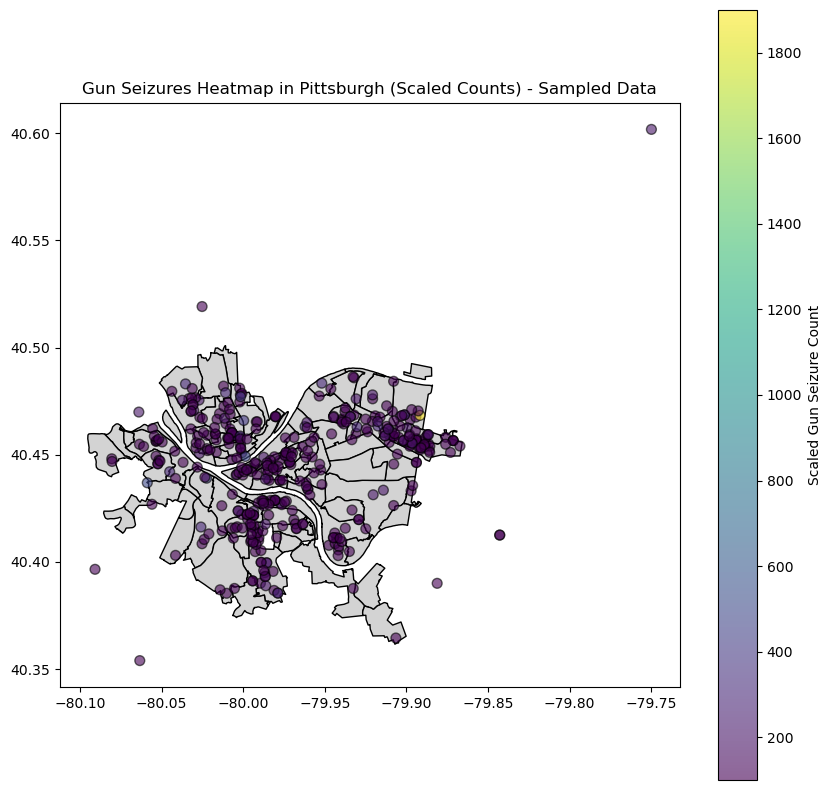

In [208]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize

gdf = gpd.read_file('pittsburgh.geojson')  

gun_seizures = pd.read_csv('firearms.csv')  

gun_seizures_cleaned = gun_seizures[['latitude', 'longitude', 'total_count']].dropna()
gun_seizures_cleaned = gun_seizures_cleaned[~gun_seizures_cleaned.isin([np.inf, -np.inf]).any(axis=1)]
gun_seizures_cleaned = gun_seizures_cleaned[gun_seizures_cleaned['total_count'] > 0]  

sampled_data = gun_seizures_cleaned.sample(frac=0.1, random_state=42) 

sampled_data['scaled_count'] = sampled_data['total_count'] * 100  

print("Scaled Count Range:", sampled_data['scaled_count'].min(), "-", sampled_data['scaled_count'].max())

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='lightgray', edgecolor='black')  

norm = Normalize(vmin=sampled_data['scaled_count'].min(), vmax=sampled_data['scaled_count'].max())

scatter = ax.scatter(sampled_data['longitude'], sampled_data['latitude'], 
                     c=sampled_data['scaled_count'], cmap='viridis', s=50, alpha=0.6, edgecolors='k', norm=norm)

fig.colorbar(scatter, ax=ax, label='Scaled Gun Seizure Count')
plt.title('Gun Seizures Heatmap in Pittsburgh (Scaled Counts) - Sampled Data')
plt.show()

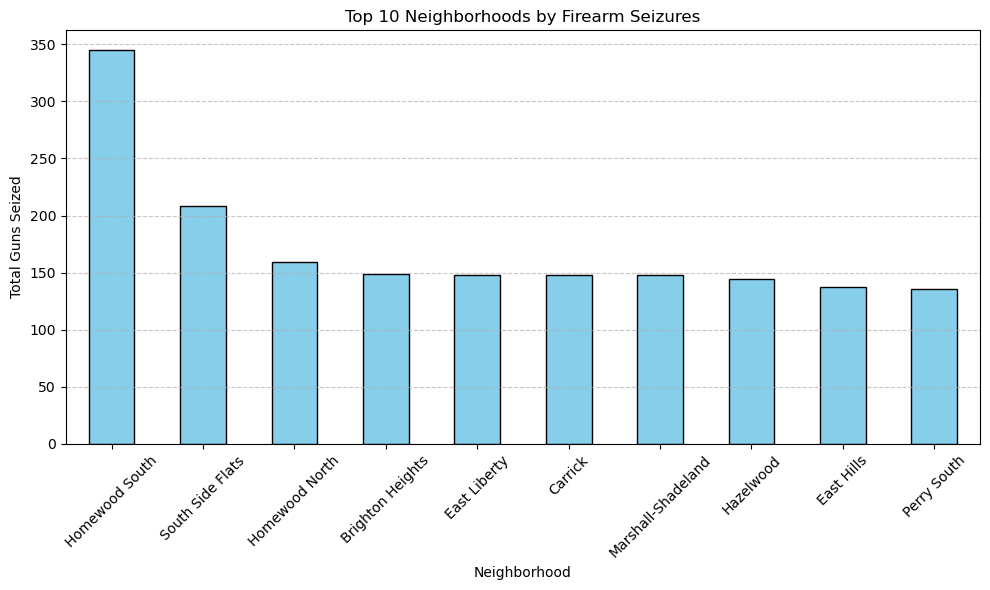

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

data_path = "firearms.csv"
df = pd.read_csv(data_path)

columns_to_drop = ['latitude', 'longitude', 'fire_zone', 'public_works_division', 'ward', 'tract', 'council_district']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

neighborhood_totals = df_cleaned.groupby('neighborhood')['total_count'].sum().sort_values(ascending=False)

top_neighborhoods = neighborhood_totals.head(10)  # Top 10 neighborhoods
top_neighborhoods.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

plt.title('Top 10 Neighborhoods by Firearm Seizures')
plt.xlabel('Neighborhood')
plt.ylabel('Total Guns Seized')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [161]:
print("Original Data Length:", len(gun_seizures))
print("Filtered Data Length:", len(gun_seizures_cleaned))

Original Data Length: 4570
Filtered Data Length: 3917


In [165]:
print(gdf.columns)

Index(['OBJECTID', 'ZIP', 'NAME', 'ZIPTYPE', 'STATE', 'STATEFIPS',
       'COUNTYFIPS', 'COUNTYNAME', 'S3DZIP', 'LAT', 'LON', 'EMPTYCOL',
       'TOTRESCNT', 'MFDU', 'SFDU', 'BOXCNT', 'BIZCNT', 'RELVER', 'COLOR',
       'GlobalID', 'SHAPESTArea', 'SHAPESTLength', 'geometry'],
      dtype='object')
